In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<function matplotlib.pyplot.show(*args, **kw)>

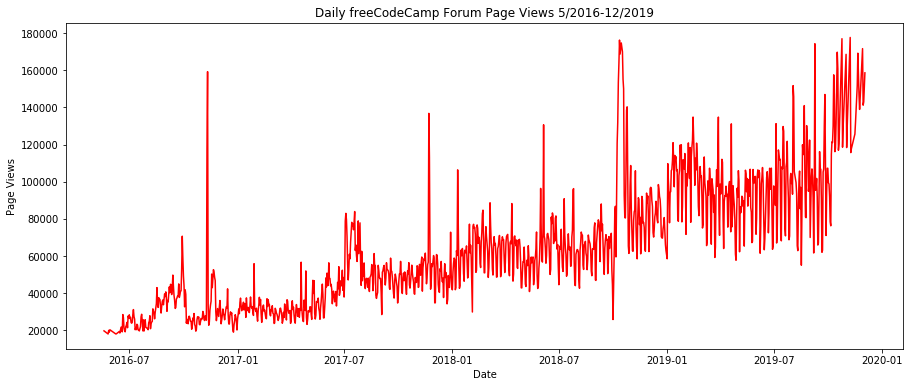

In [3]:


#Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates=['date'],index_col=['date'])

#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df_clean = df[(df["value"] >= df['value'].quantile(0.025)) &
              (df["value"] <= df['value'].quantile(0.975))]

#Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
#The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
#The label on the x axis should be "Date" and the label on the y axis should be "Page Views".


fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df_clean.index,df_clean["value"],color='red')
ax.set(xlabel="Date",
       ylabel="Page Views",
       title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

plt.show






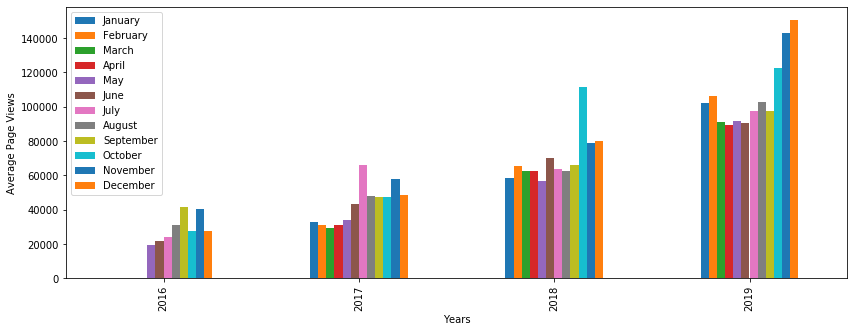

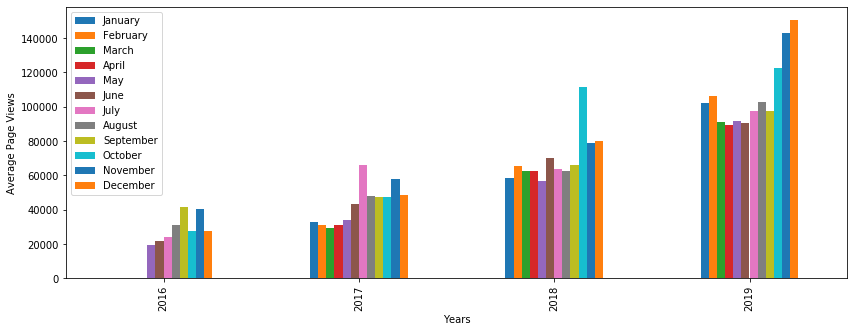

In [4]:
import datetime

def draw_bar_plot(df_clean):
    df_bar = df_clean.copy()
    df_bar["month"]= df_bar.index.month
    df_bar["year"]= df_bar.index.year
    df_bar_grouped = df_bar.groupby(["year","month"])["value"].mean().unstack()

    axes = df_bar_grouped.plot.bar(figsize=(14,5))
    axes.set_xlabel("Years")
    axes.set_ylabel("Average Page Views")

    axes.legend(labels = [datetime.datetime.strptime(str(d), "%m").strftime("%B") for d in sorted(df_bar.index.month.unique())])
    fig = axes.get_figure()
    fig.savefig('bar_plot.png')
    return fig


draw_bar_plot(df_clean)



Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

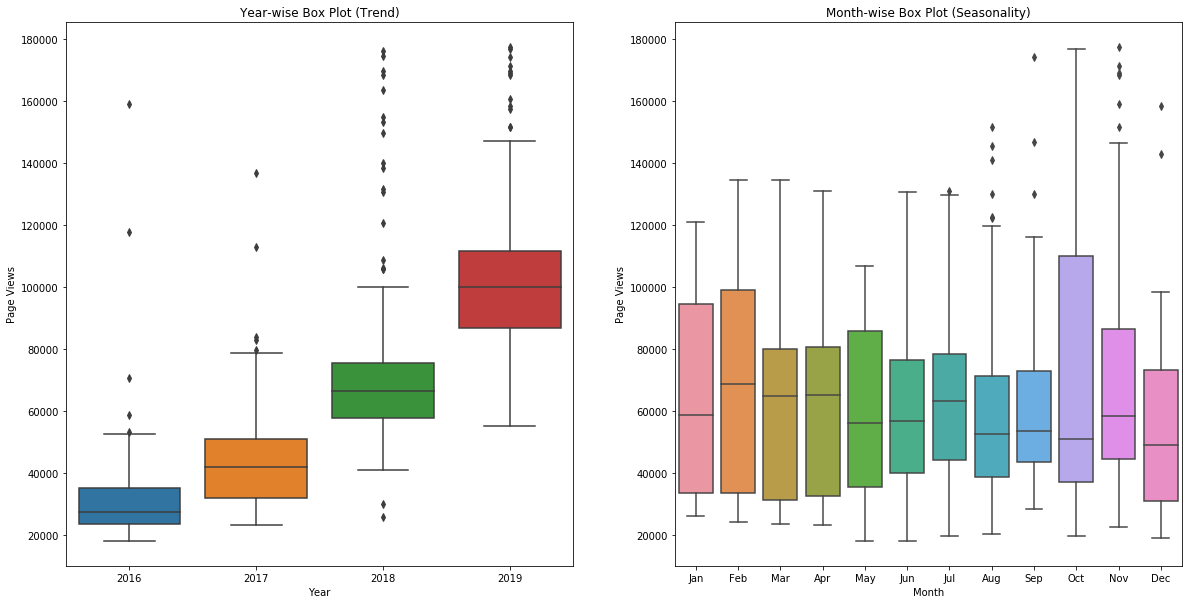

In [23]:
def draw_box_plot()
df_box = df_clean.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(10)
ax1 = sns.boxplot(x = df_box["year"], y = df_box["value"], ax= ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")
ax1.set_title("Year-wise Box Plot (Trend)")
order1 = ["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax2 = sns.boxplot(x = df_box["month"], y = df_box["value"], ax= ax2, order = order1)
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")
ax2.set_title("Month-wise Box Plot (Seasonality)")

#df_box
#axes = df_box_month_grouped.plot.box(figsize=(14,5))




In [19]:
df_box['year'] = [d.year for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec
